## This Code is Support Vector Machine Optimization Problem.

#### We were only looking for the weights and the Bias in the case of Iris datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

### import packages to solve the Quadratic programming

from cvxopt import matrix, solvers

In [2]:
data =load_iris()

In [3]:

Y  = data.target[data.target!=2]
X = data.data[:,:2][:100]

In [4]:
Y = np.where(Y==0,-1,1)

In [5]:
A = Y.reshape(1, -1)
A= A.astype('float')
A = matrix(A)

In [6]:
print ('The features shape and the target shape are respectively\n{}\n{}'
       .format(X.shape,Y.shape))

The features shape and the target shape are respectively
(100, 2)
(100,)


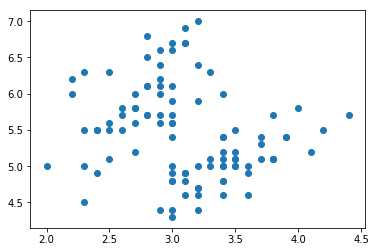

In [7]:
plt.scatter(X[:,1],X[:,0])

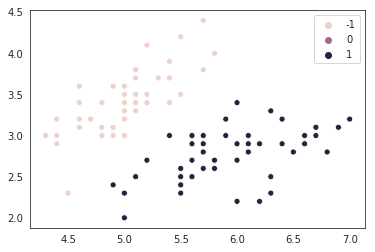

In [8]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=Y.reshape(-1));

In [9]:
### Reshape the target variable
Y=Y.reshape(-1,1)

In [10]:
## Construct the Matrix Y1=YY.T
Y1=np.dot(Y,Y.T)

In [11]:
## Construct the matrix X1=XX.T
X1 = np.dot(X,X.T)

In [12]:
## Quadratatic Matrix
Q = np.multiply(Y1,X1)

In [13]:
Q = matrix(Q)

In [14]:
### Small q matrix 
p = -1*np.ones((len(X1),1))

In [15]:
p=matrix(p)

In [16]:
apl =np.identity(len(X1))

In [17]:
G = -1*apl

In [18]:
G = matrix(G)

In [19]:
h =np.zeros(len(X1))

In [20]:
h=matrix(h)

In [21]:
b = matrix(np.zeros(1))

In [22]:
sol=solvers.qp(Q,p,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0: -1.7589e+01 -3.8372e+01  3e+02  2e+01  2e+00
 1: -3.0327e+01 -3.6084e+01  1e+02  6e+00  7e-01
 2: -5.7223e+01 -5.3982e+01  1e+02  4e+00  5e-01
 3: -4.3062e+01 -4.2587e+01  5e+01  1e+00  2e-01
 4: -3.3934e+01 -3.4338e+01  4e+00  9e-02  1e-02
 5: -3.3794e+01 -3.3801e+01  4e-02  1e-03  1e-04
 6: -3.3795e+01 -3.3795e+01  4e-04  1e-05  1e-06
 7: -3.3795e+01 -3.3795e+01  4e-06  1e-07  1e-08
Optimal solution found.


In [23]:
Solu = np.array(sol['x'])

In [24]:
### Write a function.

In [25]:
Y  = data.target[data.target!=2]
X = data.data[:,:2][:100]
Y = np.where(Y==0,-1,1)

In [26]:
def fit(x, y): 
    N = x.shape[0]
    M = x.shape[0]
    ### Reshape the target variable
    y=y.reshape(-1,1)
    y1=np.dot(y,y.T)
    x1 = np.dot(x,x.T)
    Q = np.multiply(y1,x1)
    P = matrix(Q)
    q =matrix(-1*np.ones((N,1)))
    #q = matrix(-np.ones((N, 1)))
    G =matrix(-1*np.identity(N))
    #G = matrix(-np.eye(M))
    h = matrix(np.zeros(M))
    A = y.T
    A= A.astype('float')
    A = matrix(A)
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alpha_n = np.array(sol['x'])
    #print(G.size)
    return alpha_n

In [27]:
## Weight
Solu = fit(X,Y)

     pcost       dcost       gap    pres   dres
 0: -1.7589e+01 -3.8372e+01  3e+02  2e+01  2e+00
 1: -3.0327e+01 -3.6084e+01  1e+02  6e+00  7e-01
 2: -5.7223e+01 -5.3982e+01  1e+02  4e+00  5e-01
 3: -4.3062e+01 -4.2587e+01  5e+01  1e+00  2e-01
 4: -3.3934e+01 -3.4338e+01  4e+00  9e-02  1e-02
 5: -3.3794e+01 -3.3801e+01  4e-02  1e-03  1e-04
 6: -3.3795e+01 -3.3795e+01  4e-04  1e-05  1e-06
 7: -3.3795e+01 -3.3795e+01  4e-06  1e-07  1e-08
Optimal solution found.


In [28]:
Y=Y.reshape(-1,1)

In [29]:
w = np.sum(Solu*Y*X,axis=0)

In [32]:
cond = (Solu > 1e-4).reshape(-1)
b = Y[cond] - np.dot(X[cond], w)
bias = b[0]

In [33]:
bias

array([-17.31578944, -17.31578944, -19.31578943, -19.31578944])